<a href="https://colab.research.google.com/github/JuanZapa7a/Hello-world/blob/readme-edits/Detectores_de_Bordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



  # Detectores de Bordes



   


   

Estos son solo algunos de los algoritmos populares para la detección de bordes en imágenes. Cada uno tiene sus ventajas y desventajas, y la elección del algoritmo depende de las características específicas de tu aplicación y de la calidad de la imagen. Puedes ajustar los parámetros de estos algoritmos para obtener los resultados deseados en tu imagen.

Detectar bordes en una imagen es un paso importante en el procesamiento de imágenes y visión por computadora. Existen varios algoritmos populares para la detección de bordes en la literatura, y esta es una breve descripción de tres de los más conocidos junto con ejemplos de código en Python:

1. **Operador Sobel:**

   El operador Sobel es un filtro de convolución que se utiliza para resaltar bordes en una imagen. Se basa en la idea de calcular gradientes de intensidad en direcciones vertical y horizontal y combinarlos para obtener el gradiente total en cada píxel. El operador Sobel utiliza dos kernels, uno para la detección de bordes verticales y otro para la detección de bordes horizontales.

   Fórmulas en LaTeX:
   - Gradiente vertical (Gy):
     \[ Gy = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \]

   - Gradiente horizontal (Gx):
     \[ Gx = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \]


El gradiente total en el detector Sobel se calcula combinando los gradientes parciales en las direcciones vertical (Y) y horizontal (X). El gradiente total se calcula utilizando la siguiente fórmula:

$$
\text{Gradiente Total} = \sqrt{\text{(Gradiente en X)}^2 + \text{(Gradiente en Y)}^2}
$$

Donde:
- "Gradiente en X" se refiere al resultado de aplicar el kernel de Sobel en la dirección horizontal.
- "Gradiente en Y" se refiere al resultado de aplicar el kernel de Sobel en la dirección vertical.

Estos gradientes parciales se calculan utilizando los operadores de Sobel como se muestra en el ejemplo de código. El gradiente total es una medida de la magnitud del cambio en la intensidad de la imagen en cada píxel y se utiliza para resaltar los bordes en la dirección donde la intensidad cambia más rápidamente.

   Ejemplo de código en Python:

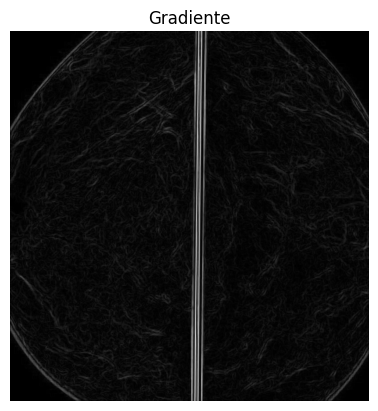

In [13]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Descargar una imagen de ejemplo desde Internet (puedes cambiar la URL)
url = "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322068_1100-800x825.jpg"
response = urllib.request.urlopen(url)
img = np.asarray(bytearray(response.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)

# Aplicar el operador Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcular el gradiente total
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Mostrar la imagen del gradiente utilizando matplotlib
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradiente')
plt.axis('off')  # Oculta los ejes
plt.show()

**NOTA**: Los valores del kernel de Sobel (-1, -2, 0, 1, 2) se eligen para calcular los gradientes en las direcciones horizontal y vertical de manera eficiente y efectiva. Estos valores son parte de un kernel que se utiliza para realizar una operación de convolución en la imagen. La elección de estos valores se basa en principios matemáticos y de procesamiento de imágenes que permiten detectar cambios de intensidad en la imagen.

Aquí hay una explicación de por qué se eligen estos valores en el kernel de Sobel:

1. **Detección de Cambios de Intensidad:** El propósito del kernel de Sobel es detectar cambios de intensidad (gradientes) en la imagen. Para hacerlo, el kernel se desplaza sobre la imagen y realiza una suma ponderada de los valores de los píxeles vecinos. Los valores positivos y negativos en el kernel reflejan el cambio de intensidad en direcciones opuestas.

2. **Acentuación de los Cambios de Intensidad:** Los valores más grandes en los extremos del kernel (-2 y 2) acentúan los cambios de intensidad más significativos, ya que contribuyen más al resultado de la convolución. Los valores más pequeños en el centro (-1 y 1) proporcionan un suavizado ligero para reducir el ruido en la imagen.

3. **Dirección de la Detección:** El kernel de Sobel se utiliza en dos variantes: uno para la detección de gradientes horizontales y otro para la detección de gradientes verticales. Por lo tanto, estos valores se ajustan para las direcciones específicas.

El kernel de Sobel es una elección común y efectiva para la detección de bordes y gradientes en imágenes debido a su capacidad para resaltar cambios de intensidad en direcciones específicas. Puede ser personalizado o combinado con otros operadores según las necesidades de una aplicación particular. *texto en cursiva*

2. **Operador Canny:**

   El operador Canny es uno de los algoritmos más utilizados para la detección de bordes. Combina varios pasos, incluyendo suavizado Gaussiano, detección de gradientes, supresión de no máximos y umbralización por histéresis.

   Ejemplo de código en Python:

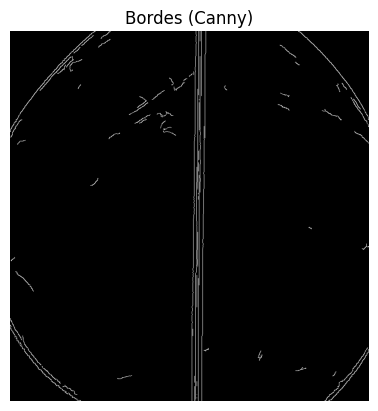

In [14]:
# Aplicar el operador Canny
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# Convertir la imagen a tipo float para mostrarla con matplotlib
edges_float = edges.astype(float)

# Mostrar los bordes detectados utilizando matplotlib
plt.imshow(edges_float, cmap='gray', vmin=0, vmax=255)
plt.title('Bordes (Canny)')
plt.axis('off')  # Oculta los ejes
plt.show()

**NOTA**: El operador Canny es uno de los algoritmos más utilizados para la detección de bordes en imágenes. Fue desarrollado por John Canny en 1986 y se utiliza ampliamente en el procesamiento de imágenes y visión por computadora debido a su eficacia y versatilidad.

El proceso de detección de bordes con el operador Canny implica varios pasos:

1. **Suavizado Gaussiano:** El primer paso consiste en aplicar un suavizado Gaussiano a la imagen para reducir el ruido. El suavizado Gaussiano es útil para eliminar detalles finos y pequeños variaciones de intensidad que no son relevantes para la detección de bordes.

2. **Cálculo de Gradientes:** A continuación, se calculan los gradientes de la imagen. Se utilizan operadores de derivación (generalmente Sobel) para calcular las derivadas de la intensidad en las direcciones horizontal (x) y vertical (y). Estos gradientes representan las tasas de cambio de intensidad en la imagen en esas direcciones.

3. **Magnitud del Gradiente:** Se calcula la magnitud del gradiente en cada punto de la imagen utilizando la fórmula $\sqrt{\text{Gradiente en X}^2 + \text{Gradiente en Y}^2}$. Esto da como resultado una imagen que resalta las regiones donde hay cambios bruscos de intensidad.

4. **Supresión de No Máximos:** Este paso implica recorrer la imagen de la magnitud del gradiente y mantener solo los puntos que representan los máximos locales en la dirección del gradiente. Esto ayuda a adelgazar los bordes y mantener solo un píxel de ancho en la ubicación precisa del borde.

5. **Umbralización por Histéresis:** Finalmente, se aplican dos umbrales en la imagen resultante. Los píxeles con magnitudes de gradiente superiores al umbral alto se consideran bordes fuertes, y los píxeles con magnitudes de gradiente entre los umbrales bajo y alto se consideran bordes débiles. Los bordes débiles se pueden mantener si están conectados a bordes fuertes en un proceso llamado umbralización por histéresis.

El operador Canny es efectivo para detectar bordes nítidos en imágenes con bajo ruido y ofrece un buen control sobre la sensibilidad a los bordes y la supresión de ruido. Sin embargo, la elección de los umbrales y otros parámetros es crítica y debe ajustarse según las características específicas de la imagen y la aplicación.

3. **Operador Laplaciano de Gauss (LoG):**

   El operador LoG detecta bordes encontrando el cambio de signo en el segundo derivado de la imagen después de aplicar un suavizado Gaussiano. Este operador es útil para detectar bordes de varios anchos y formas.

   Fórmula:
   $$ LoG(x, y) = -\frac{1}{\pi \sigma^4} \left(1 - \frac{x^2 + y^2}{2\sigma^2}\right) e^{-\frac{x^2 + y^2}{2\sigma^2}} $$

   Ejemplo de código en Python:


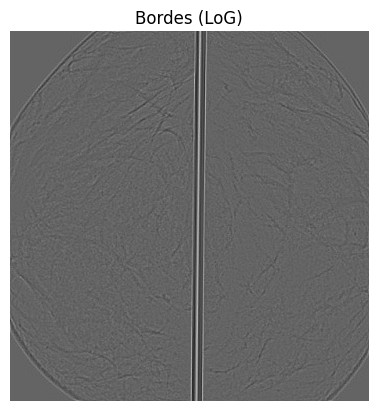

In [16]:
import cv2


# Aplicar el operador LoG
log_image = cv2.GaussianBlur(img, (3, 3), 0)  # Suavizado Gaussiano
log_image = cv2.Laplacian(log_image, cv2.CV_64F)

# Mostrar la imagen con bordes detectados utilizando matplotlib
plt.imshow(log_image, cmap='gray')
plt.title('Bordes (LoG)')
plt.axis('off')  # Oculta los ejes
plt.show()


**NOTA**: El operador LoG, o Laplaciano de Gauss, es un operador utilizado en el procesamiento de imágenes para detectar bordes y puntos de interés. Combina dos operaciones principales: el suavizado Gaussiano y la detección del laplaciano.

Aquí están los pasos fundamentales del operador LoG:

1. **Suavizado Gaussiano:** El primer paso es aplicar un filtro Gaussiano a la imagen original. El filtro Gaussiano se utiliza para suavizar la imagen y reducir el ruido. El suavizado Gaussiano es especialmente útil para eliminar detalles finos y pequeñas variaciones de intensidad en la imagen.

2. **Detección del Laplaciano:** Luego, se aplica el operador Laplaciano a la imagen suavizada. El operador Laplaciano calcula la segunda derivada espacial de la imagen, lo que significa que resalta las regiones donde la intensidad cambia abruptamente. Matemáticamente, esto se representa como:

   $$ \text{LoG}(x, y) = -\frac{1}{\pi \sigma^4} \left(1 - \frac{x^2 + y^2}{2\sigma^2}\right) e^{-\frac{x^2 + y^2}{2\sigma^2}} $$

   Donde \( (x, y) \) son las coordenadas en la imagen, y \( \sigma \) es el parámetro de suavizado Gaussiano.

3. **Umbralización:** Después de aplicar el operador LoG, puedes aplicar un umbral para identificar los bordes en la imagen. Los valores positivos en la imagen Laplaciana representan áreas de cambio de intensidad positivo, y los valores negativos representan áreas de cambio de intensidad negativo.

4. **Resultados:** La imagen resultante después de aplicar el operador LoG contendrá puntos donde se encuentren bordes, esquinas y puntos de interés, resaltados según la magnitud del cambio de intensidad.

El operador LoG es útil para detectar bordes de diferentes grosores y formas, así como puntos de interés en una imagen. Sin embargo, la elección del valor de \( \sigma \) en el suavizado Gaussiano puede afectar la sensibilidad del operador a los detalles. Un valor más grande de \( \sigma \) suaviza más la imagen, lo que puede perder detalles más finos, mientras que un valor más pequeño de \( \sigma \) conservará más detalles.

En resumen, el operador LoG es una técnica poderosa para la detección de bordes y puntos de interés en imágenes y se utiliza en aplicaciones como visión por computadora, procesamiento de imágenes médicas y análisis de imágenes.

## Otros detectores de bordes

Los detectores de bordes que mencionaste, como el operador Sobel y el operador Canny, son ciertamente algunos de los más utilizados y clásicos en el procesamiento de imágenes. Sin embargo, existen otros detectores de bordes que pueden ser relevantes según las necesidades específicas de una aplicación o los desafíos particulares de una imagen. Aquí hay algunos ejemplos adicionales:

1. **Detector de Bordes de Prewitt:** Similar al operador Sobel, el detector de bordes de Prewitt también se utiliza para calcular gradientes en direcciones horizontal y vertical.

2. **Detector de Bordes de Roberts:** Este detector de bordes utiliza dos kernels pequeños para calcular los gradientes en las direcciones diagonalmente opuestas.

3. **Operador de Kirsch:** Similar al operador Sobel, el operador de Kirsch utiliza ocho kernels diferentes para calcular gradientes en varias direcciones.

4. **Detector de Bordes de Frei-Chen:** Este detector de bordes utiliza un conjunto de nueve kernels diferentes para calcular gradientes en múltiples direcciones y detectar bordes en diferentes ángulos.

La elección del detector de bordes depende de varios factores, como el ruido en la imagen, el tipo de bordes que se deben detectar, la sensibilidad deseada y otros requisitos específicos de la aplicación. Por lo tanto, es importante conocer una variedad de métodos y experimentar con ellos para determinar cuál es el más adecuado para una situación dada.

En resumen, aunque los detectores de bordes clásicos son esenciales, la diversidad de técnicas disponibles ofrece la flexibilidad necesaria para abordar una amplia gama de desafíos en el procesamiento de imágenes y la visión por computadora.

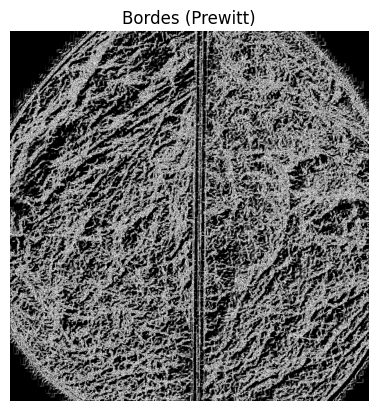

In [18]:
import cv2
import numpy as np

# Aplicar el detector de bordes de Prewitt
prewittx = cv2.filter2D(img, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitty = cv2.filter2D(img, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Calcular el gradiente total
gradient_magnitude = np.sqrt(prewittx**2 + prewitty**2)

# Mostrar la imagen del gradiente
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Bordes (Prewitt)')
plt.axis('off')  # Oculta los ejes
plt.show()


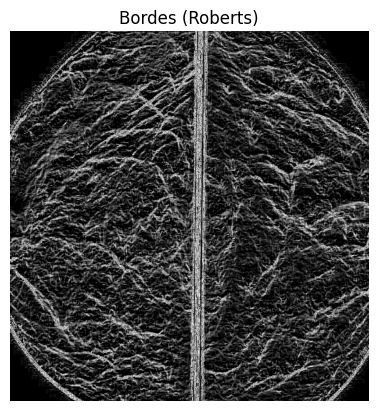

In [19]:
import cv2
import numpy as np

# Aplicar el detector de bordes de Roberts
robertsx = cv2.filter2D(img, -1, np.array([[1, 0], [0, -1]]))
robertsy = cv2.filter2D(img, -1, np.array([[0, 1], [-1, 0]]))

# Calcular el gradiente total
gradient_magnitude = np.sqrt(robertsx**2 + robertsy**2)

# Mostrar la imagen del gradiente
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Bordes (Roberts)')
plt.axis('off')  # Oculta los ejes
plt.show()


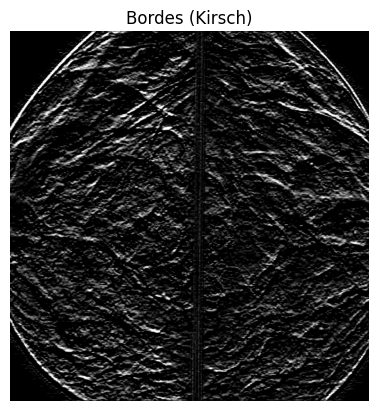

In [20]:
import cv2
import numpy as np

# Aplicar el operador de Kirsch (dirección 0)
kirsch0 = cv2.filter2D(img, -1, np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]))

# Calcular el gradiente total
gradient_magnitude = np.abs(kirsch0)

# Mostrar la imagen del gradiente
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Bordes (Kirsch)')
plt.axis('off')  # Oculta los ejes
plt.show()


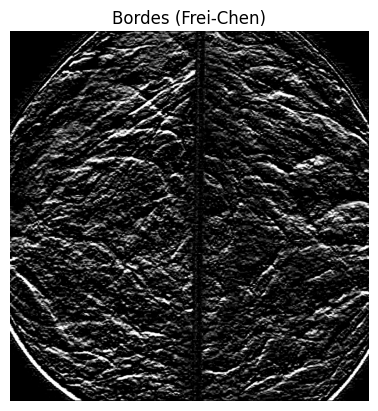

In [21]:
import cv2
import numpy as np

# Aplicar el detector de bordes de Frei-Chen
frei_chen = cv2.filter2D(img, -1, np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]]))

# Calcular el gradiente total
gradient_magnitude = np.abs(frei_chen)

# Mostrar la imagen del gradiente
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Bordes (Frei-Chen)')
plt.axis('off')  # Oculta los ejes
plt.show()